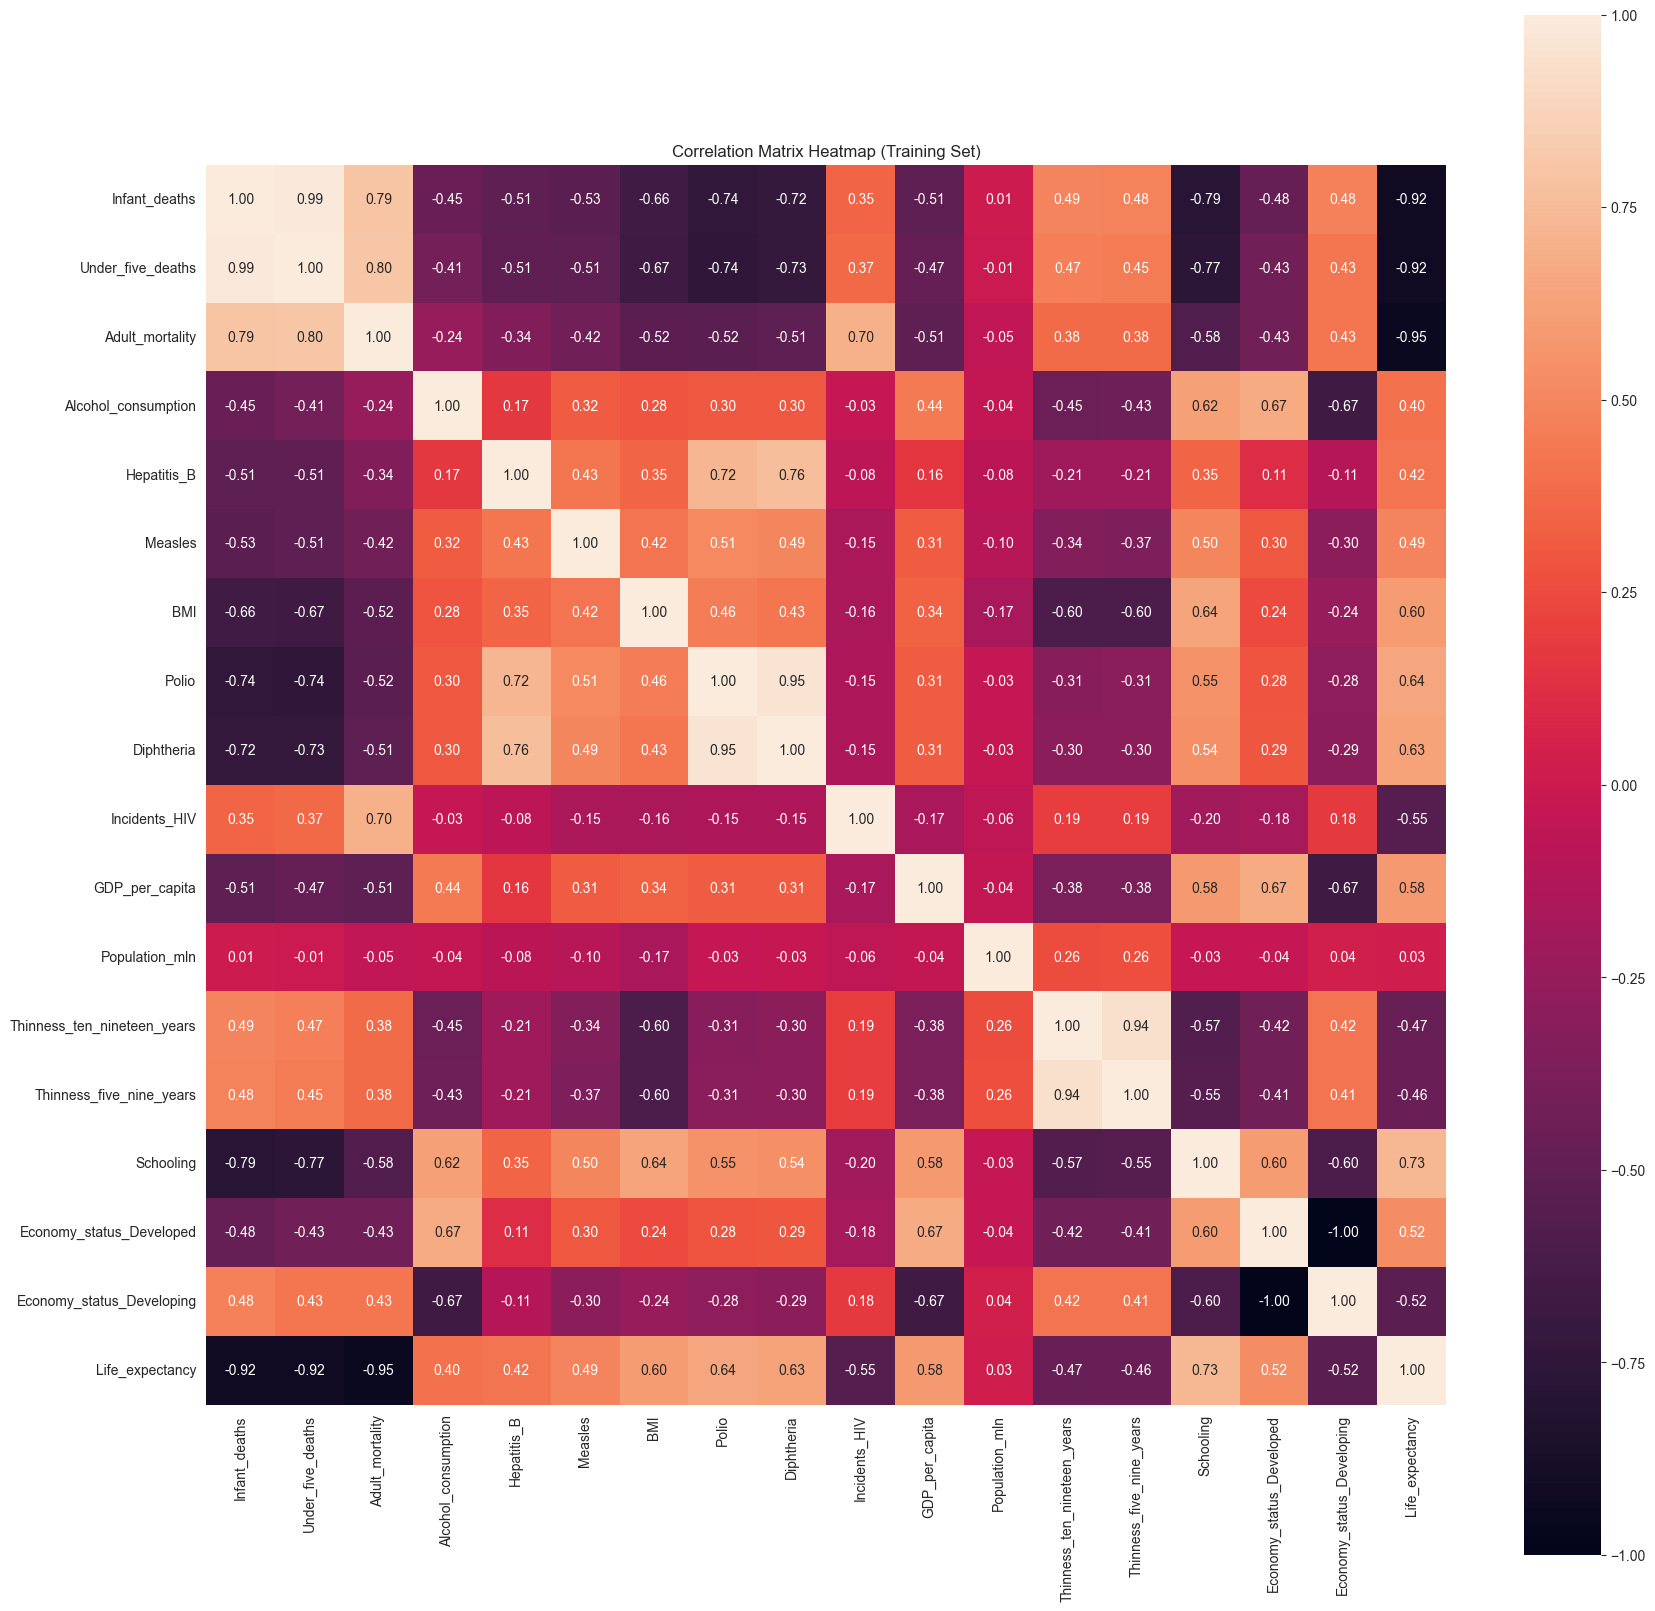

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Load dataset
df = pd.read_csv('../data/data.csv')

X = df.drop(columns=['Country', 'Region', 'Year', 'Life_expectancy'])
y = df['Life_expectancy']

# Visualize the correlation matrix using a heatmap
df_with_target = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_with_target.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap (Training Set)')
plt.show()

## Calculate the Variance Inflation Factor (VIF) for each feature

In [113]:
# Calculate the Variance Inflation Factor (VIF) for each feature to check for multicollinearity
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

print(calculate_vif(X))

                        Feature         VIF
0                 Infant_deaths   44.761523
1             Under_five_deaths   45.290335
2               Adult_mortality    7.856021
3           Alcohol_consumption    2.408911
4                   Hepatitis_B    2.588503
5                       Measles    1.587821
6                           BMI    2.727398
7                         Polio   12.010371
8                    Diphtheria   13.001018
9                 Incidents_HIV    2.898779
10               GDP_per_capita    2.323248
11               Population_mln    1.151908
12  Thinness_ten_nineteen_years    8.950249
13     Thinness_five_nine_years    8.958574
14                    Schooling    4.394280
15     Economy_status_Developed  118.117094
16    Economy_status_Developing  463.564248


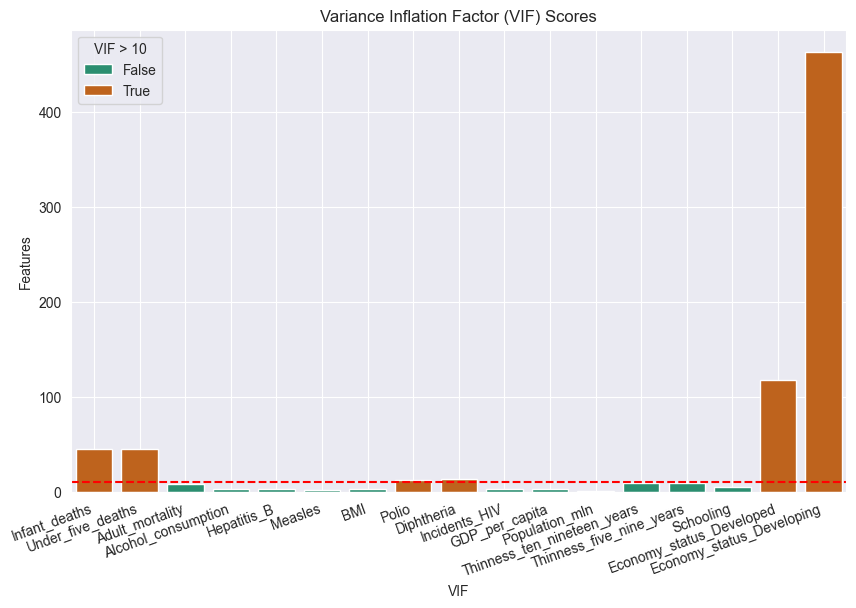

In [114]:
# Plot VIF scores
def plot_vif(vif_scores):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Feature', y='VIF', data=vif_scores, palette='Dark2', hue=vif_scores['VIF'] > 10)
    plt.axhline(y=10, color='red', linestyle='--')
    plt.title('Variance Inflation Factor (VIF) Scores')
    plt.xlabel('VIF')
    plt.xticks(rotation=20, ha='right')
    plt.ylabel('Features')
    plt.legend(title='VIF > 10')
    plt.grid(True)
    plt.show()

plot_vif(calculate_vif(X))

## Feature Engineering

In [115]:
# Drop 'Infant_deaths' due to high VIF with 'Under_five_deaths'
X.drop(columns=['Infant_deaths'], inplace=True)

# Rename 'Economy_Status_developed' to 'Economy_status'
X.rename(columns={'Economy_status_Developed': 'Economy_status'}, inplace=True)
# Drop 'Economy_Status_Developing' due to high VIF with 'Economy_status'
X.drop(columns=['Economy_status_Developing'], inplace=True)

# Combine Vaccination features into a single feature
X['Vaccination_Polio_Diphteria_Hepatitis_B'] = X['Polio'] + X['Diphtheria'] + X['Hepatitis_B']
X.drop(columns=['Polio', 'Diphtheria', 'Hepatitis_B'], inplace=True)

# Combine Thinness features into a single feature
X['Thinness'] = X['Thinness_ten_nineteen_years'] + X['Thinness_five_nine_years']
X.drop(columns=['Thinness_ten_nineteen_years', 'Thinness_five_nine_years'], inplace=True)

# Combine Mortality features into a single feature
X['Mortality'] = X['Under_five_deaths'] + X['Adult_mortality']
X.drop(columns=['Under_five_deaths', 'Adult_mortality'], inplace=True)

In [116]:
# Calculate the Variance Inflation Factor (VIF) for each feature to check for multicollinearity
print(calculate_vif(X))

                                    Feature        VIF
0                       Alcohol_consumption   5.692696
1                                   Measles  28.036074
2                                       BMI  86.266951
3                             Incidents_HIV   2.114342
4                            GDP_per_capita   3.128484
5                            Population_mln   1.205299
6                                 Schooling  25.163742
7                            Economy_status   3.461885
8   Vaccination_Polio_Diphteria_Hepatitis_B  58.992953
9                                  Thinness   3.609641
10                                Mortality  10.142462


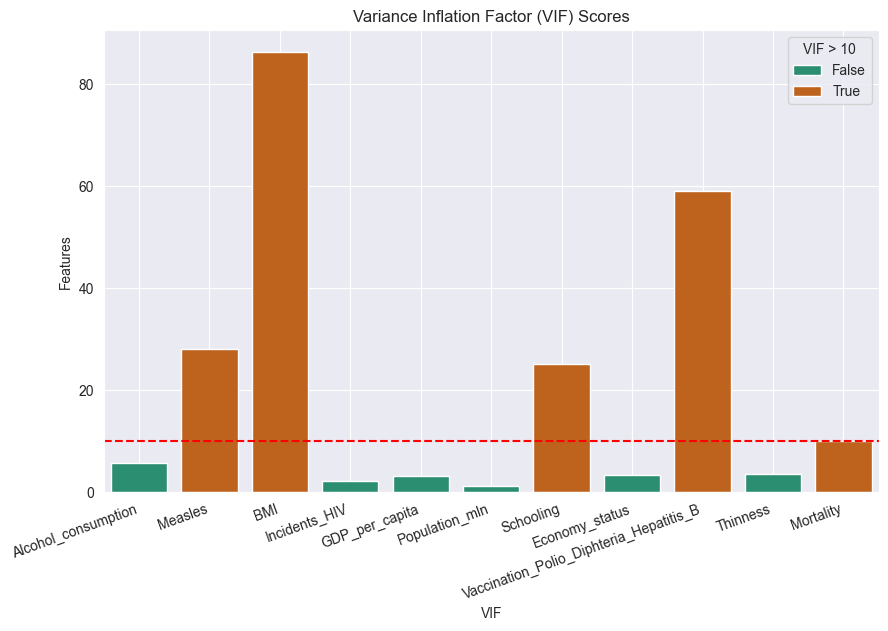

In [117]:
# Plot VIF scores
plot_vif(calculate_vif(X))

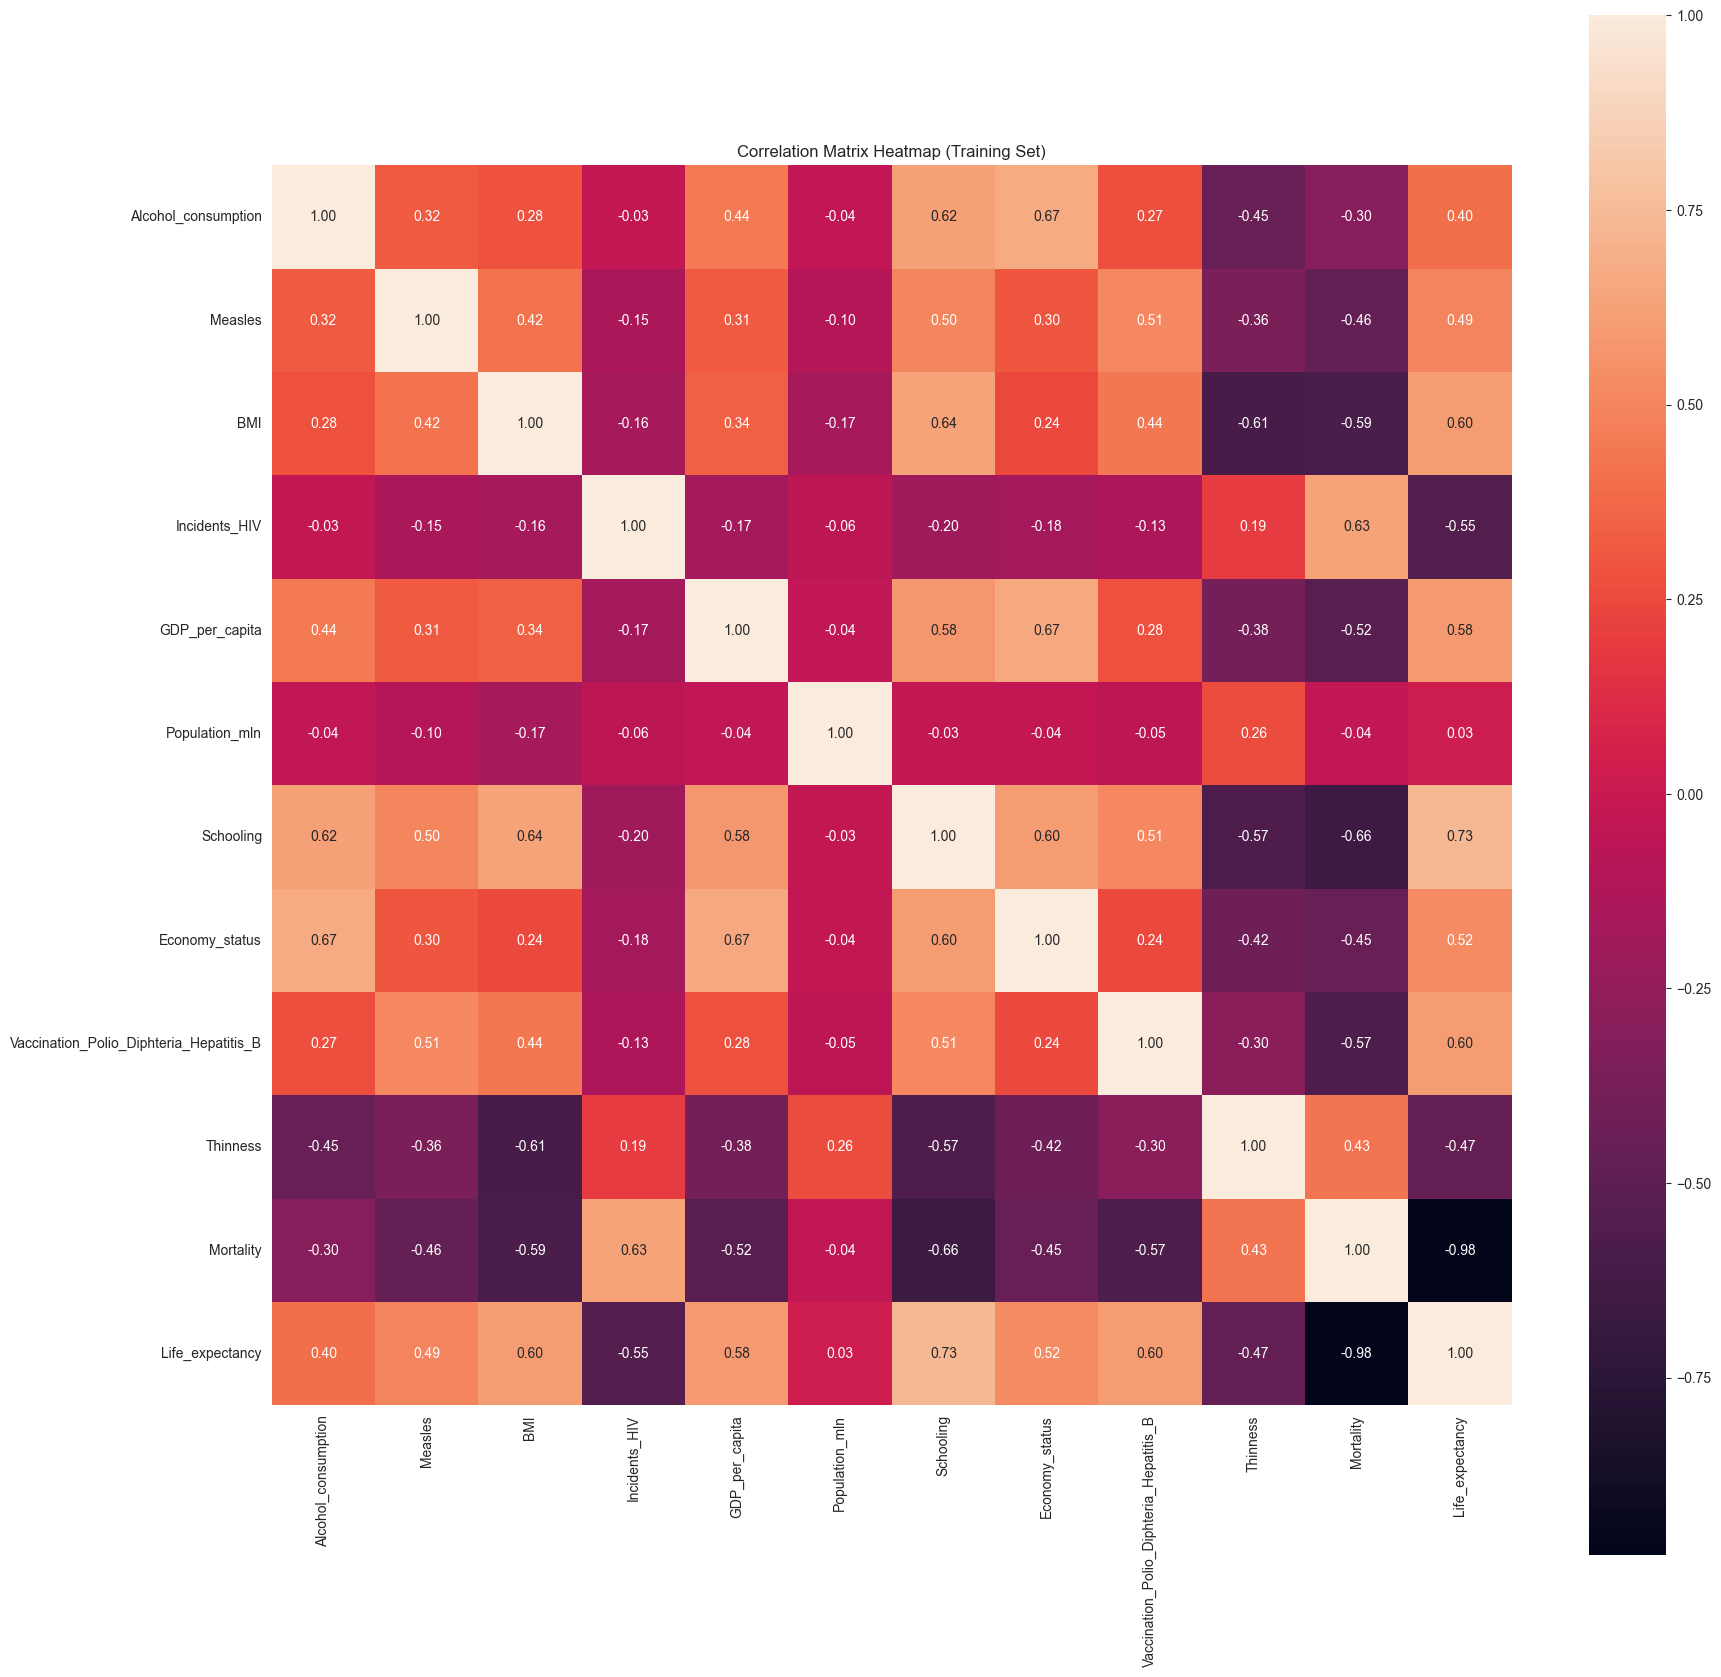

In [118]:
# Visualize the correlation matrix using a heatmap
df_with_target = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_with_target.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap (Training Set)')
plt.show()

## Split the dataset into training and testing sets

In [119]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

## Train and Evaluate the Random Forest Regressor

In [120]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Recalculate the error metrics using the inverse-transformed values
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the recalculated evaluation metrics
print("Random Forest Regression Results on Original Scale:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Regression Results on Original Scale:
Mean Absolute Error (MAE): 0.3864
Mean Squared Error (MSE): 0.3022
R² Score: 0.9964


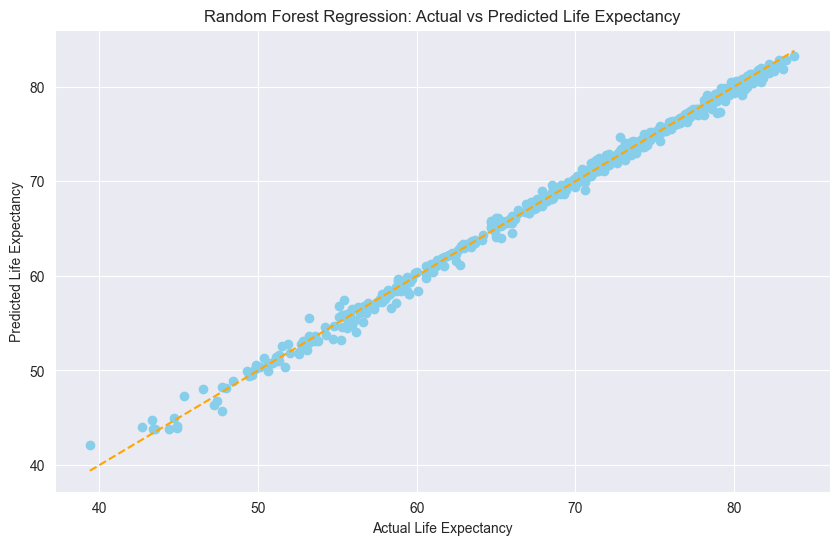

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='orange')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Random Forest Regression: Actual vs Predicted Life Expectancy")
plt.show()

## Train and Evaluate the Linear Regression

In [122]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Recalculate the error metrics using the inverse-transformed values
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the recalculated evaluation metrics
print("Linear Regression Results on Original Scale:")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Results on Original Scale:
Mean Absolute Error (MAE): 1.1519
Mean Squared Error (MSE): 2.1146
R² Score: 0.9745


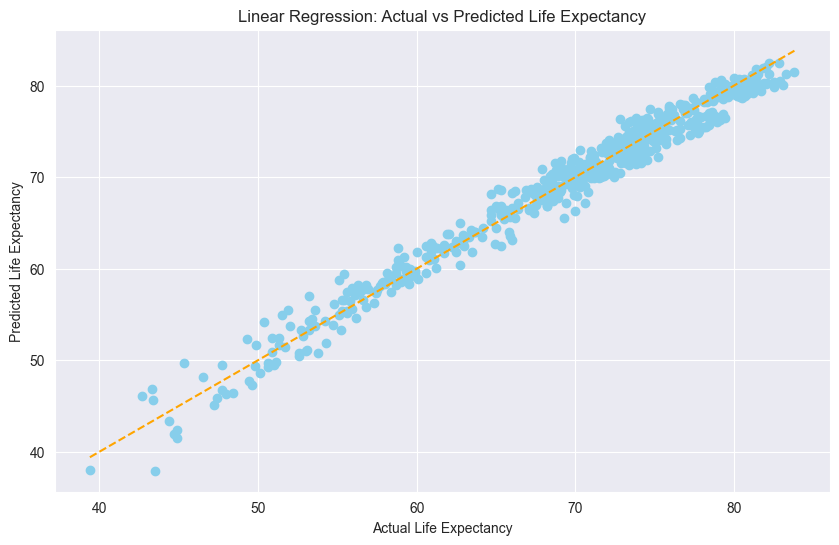

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='orange')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Linear Regression: Actual vs Predicted Life Expectancy")
plt.show()

## Train and evaluate K-Nearest Neighbors Regressor
### Find the optimal number of neighbors

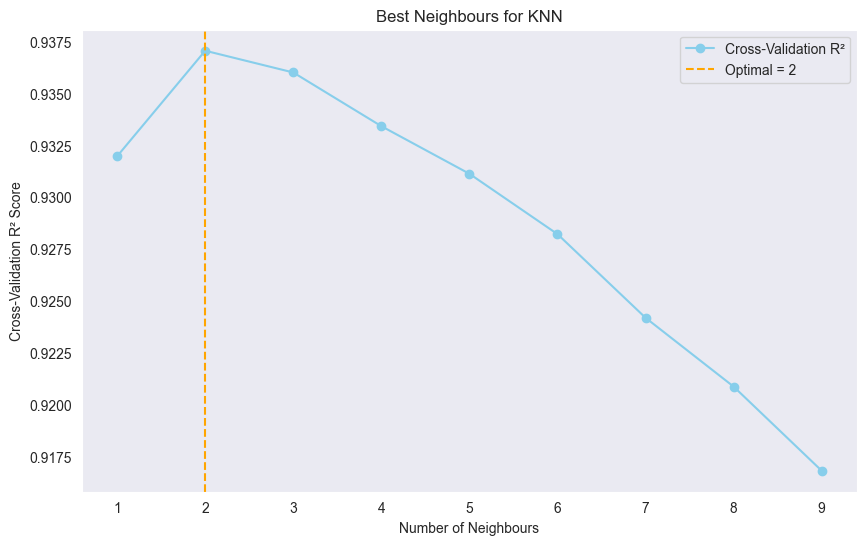

In [135]:
# Initialize the figure
fig, (ax1) = plt.subplots(1, figsize=(10, 6))

# First: Evaluate and plot for transformed data
neighbor_range = range(1, 10)
cv_scores_transformed = []

for n in neighbor_range:
    knn = KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')
    cv_scores_transformed.append(scores.mean())

best_n_neighbors_transformed = neighbor_range[np.argmax(cv_scores_transformed)]

# Plot for transformed data
ax1.plot(neighbor_range, cv_scores_transformed, marker='o', linestyle='-', color='skyblue', label="Cross-Validation R²")
ax1.axvline(best_n_neighbors_transformed, color='orange', linestyle='--',
            label=f"Optimal = {best_n_neighbors_transformed}")
ax1.set_title("Best Neighbours for KNN")
ax1.set_xlabel("Number of Neighbours")
ax1.set_ylabel("Cross-Validation R² Score")
ax1.legend()
ax1.grid()

plt.show()


## Train and Evaluate the KNN Regressor with the optimal number of neighbors

In [126]:
# Initialize and train the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Recalculate the error metrics using the inverse-transformed values
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the recalculated evaluation metrics
print("KNN Regression Results on Original Scale:")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")

KNN Regression Results on Original Scale:
Mean Absolute Error (MAE): 0.4899
Mean Squared Error (MSE): 0.6435
R² Score: 0.9922


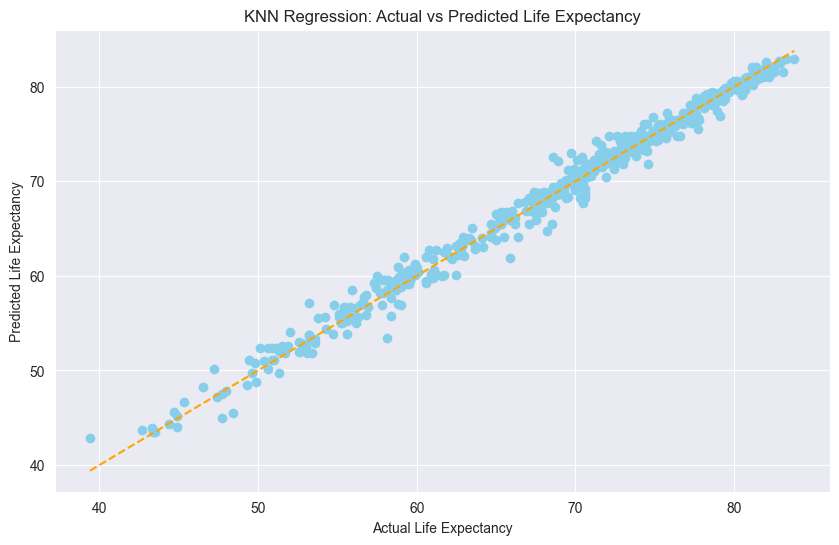

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='orange')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("KNN Regression: Actual vs Predicted Life Expectancy")
plt.show()